In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
import imutils

In [1]:
# Open video file
video = cv2.VideoCapture('videos/overtakes.mp4')
imW = video.get(cv2.CAP_PROP_FRAME_WIDTH)
imH = video.get(cv2.CAP_PROP_FRAME_HEIGHT)

frames = list(np.array([10, 25, 36, 45])  * 25)
frame_list = []

# while video.isOpened():
#     ret, frame = video.read()
#     if i in frames:
#         frame_list.append(frame)

for f in frames:
    video.set(cv2.CAP_PROP_POS_FRAMES, f)
    ret, frame = video.read()
    frame_list.append(frame) 
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


fig,axes = plt.subplots(nrows = len(frame_list), ncols = 0, figsize=(50,50))

for ax in axes.flatten():
    ax.axis('off')

for num, frame in enumerate(frame_list):
    # plt.subplot(rows,2,num+1)
    # plt.imshow(frame)

    axes[num,0].imshow(frame)

ValueError: Number of columns must be a positive integer, not 0

<Figure size 5000x5000 with 0 Axes>

array([[[105, 226, 243],
        [106, 176, 244],
        [106, 176, 244],
        ...,
        [108,  26, 145],
        [108,  26, 143],
        [109, 232, 141]],

       [[105, 226, 243],
        [106, 176, 244],
        [106, 176, 244],
        ...,
        [109, 182, 147],
        [109, 232, 140],
        [108,  76, 137]],

       [[105, 226, 243],
        [106, 176, 244],
        [106, 176, 244],
        ...,
        [108, 232, 152],
        [108, 126, 136],
        [109,  76, 127]],

       ...,

       [[129, 234,  54],
        [127,  34,  58],
        [127,  34,  58],
        ...,
        [ 10,  80,  44],
        [ 10,  80,  44],
        [ 10,  80,  44]],

       [[129, 234,  54],
        [127,  34,  58],
        [127,  34,  58],
        ...,
        [ 10,  80,  44],
        [ 10,  80,  44],
        [ 10,  80,  44]],

       [[129, 234,  54],
        [127,  34,  58],
        [127,  34,  58],
        ...,
        [ 10,  80,  44],
        [ 10,  80,  44],
        [ 10,  80,  44]]

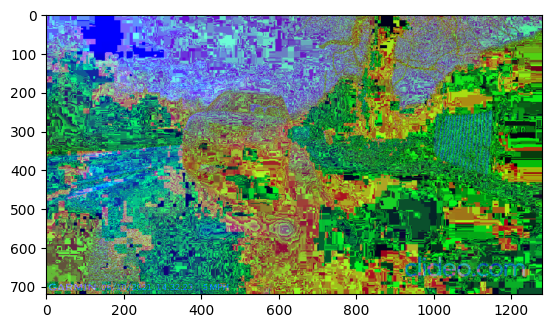

In [3]:
saturated = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

(h, s, v) = cv2.split(saturated)
s = s*50
s = np.clip(s,0,255)
saturated = cv2.merge([h,s,v])
plt.imshow(saturated)

saturated
# s*2

In [9]:
import math
import random
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive, widgets
%matplotlib inline

video = cv2.VideoCapture('videos/varia_1080.mp4')
imW = video.get(cv2.CAP_PROP_FRAME_WIDTH)
imH = video.get(cv2.CAP_PROP_FRAME_HEIGHT)

def get_frame(f):
    video.set(cv2.CAP_PROP_POS_FRAMES, f)
    _, frame = video.read()
    return frame

def filter_road_area(edges, frame):
    # https://medium.com/swlh/lane-finding-with-computer-vision-techniques-bad24828dbc0
    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255
    # Define a four sided polygon to mask
    imshape = frame.shape
    vertices = np.array([
        [    #       X             Y
            (imshape[1] * .0, imshape[0]), # bottom left
            (imshape[1] * .34, imshape[0] * .45),  # top left 
            (imshape[1] * 0.5, imshape[0] * .45), # top right
            (imshape[1] * 0.5, imshape[0]) # bottom right
        ]
    ], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    return cv2.bitwise_and(edges, mask)

def canny_edges(frame, slider_l, slider_h):
    canny=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canny=cv2.GaussianBlur(canny,(5,5),0)
    return cv2.Canny(canny,slider_l,slider_h, apertureSize=5)
    
slider_l = widgets.IntSlider(value=235, min=0, max=255,step=1)
slider_h = widgets.IntSlider(value=250, min=0, max=255,step=1)
threshold = widgets.IntSlider(value=100, min=0, max=500,step=1)
min_theta = widgets.FloatSlider(value=0, min=0, max=math.pi,step=0.01)
max_theta = widgets.FloatSlider(value=0.78, min=0, max=math.pi,step=0.01)


# frames = [random.randint(0,7*25) for f in range(9)]
frames = np.array([2, 5, 9, 12, 14, 40, 45, 50, 55]) * 27  # frames with look back 

# frames = [14*27]

def g(slider_l,slider_h, threshold, min_theta, max_theta):
    # create figure
    fig = plt.figure(figsize=(50, 30))
    # loop over images
    for i,f in enumerate(frames):
        # img = np.reshape(data[i : (i + 1)], (8, 8))
        fig.add_subplot(3, 3, i + 1)

        frame = get_frame(f)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        canny = canny_edges(frame, slider_l, slider_h)
        # canny = imutils.auto_canny(frame)

        canny = filter_road_area(canny, frame)
        
        # print(canny)
        # contours,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # cv2.getStructuringElement(cv2.MORPH, (35,2))
        # contours = [cv2.approxPolyDP(c,0.01*cv2.arcLength(c,True),True) for c in contours]
        # cv2.drawContours(image=frame, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=-1, lineType=cv2.LINE_AA)
        
        # canny = cv2.erode(canny, None, iterations=1)

        lines = cv2.HoughLines(
            image=canny,
            rho=1, theta=np.pi / 180,
            threshold=threshold, 
            lines=None, 
            min_theta=min_theta,
            max_theta=max_theta
        )

        

        if lines is not None:
            thetas: List[float] = [l[0][1] for l in lines]
            min_theta_i = thetas.index(min(thetas))

            for i in range(0, len(lines)):
                line = lines[i][0]
                rho = line[0]
                theta = line[1]

                a = math.cos(theta)
                b = math.sin(theta)

                x0 = a * rho
                y0 = b * rho
                pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
                pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
                
                color = (255,0,0) if i == min_theta_i else (255,255,255)  # highlight most voted line
                thickness = 7 if i == min_theta_i else 2

                # if i == 0: # draw only the most voted one
                cv2.line(frame, pt1, pt2, color, thickness, cv2.LINE_AA)


        # linesP = cv2.HoughLinesP(
        #     image=canny,
        #     rho=1,
        #     theta = np.pi / 180,
        #     threshold=threshold, 
        #     lines= None, 
        #     minLineLength=minLineLength,
        #     maxLineGap=maxLineGap
        # )

        # if linesP is not None:

        #     # cutoff the lines that are not vertical enough ()
        #     cutoff_line = 800
        #     linesP = [l for l in linesP if l[0][1] > cutoff_line and l[0][3] < cutoff_line]

        #     for i in range(0, len(linesP)):
        #         l = linesP[i][0]
        #         color = (255,0,0) if i == 0 else (255,255,255)  # highlight most voted line
        #         thickness = 7 if i == 0 else 2
                # cv2.line(frame, (l[0], l[1]), (l[2], l[3]), color, thickness, cv2.LINE_AA)

            # l = linesP[0][0]  # line with the most votes
            # cv2.line(canny, (l[0], l[1]), (l[2], l[3]), (255,255,255), 3, cv2.LINE_AA)


        plt.imshow(frame)

interactive_plot = interactive(g, slider_l=slider_l, slider_h=slider_h, threshold=threshold, min_theta=min_theta, max_theta=max_theta)
interactive_plot

interactive(children=(IntSlider(value=235, description='slider_l', max=255), IntSlider(value=250, description=…

In [5]:
from imutils import contours

block_size = widgets.IntSlider(value=35, min=3, max=255,step=2)
c = widgets.IntSlider(value=2, min=0, max=255, step=1)

canny_l = widgets.IntSlider(value=235, min=0, max=255,step=1)
canny_h = widgets.IntSlider(value=250, min=0, max=255,step=1)

peri_perc = widgets.FloatSlider(value=0.001, min=0.001, max=0.01,step=0.001)

# TR_TYPES = [cv2.ADAPTIVE_THRESH_MEAN_C, cv2.ADAPTIVE_THRESH_GAUSSIAN_C]

def g(block_size,c, canny_l, canny_h, peri_perc):

    frame = get_frame(frames[3])
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    canny = imutils.auto_canny(frame)  # autocanny used instead of canny configuration

    # canny=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # canny=cv2.GaussianBlur(canny,(5,5),0)
    # canny=cv2.Canny(canny,canny_l,canny_h, apertureSize=5)

    # lines = cv2.HoughLinesP(canny, 1, np.pi/180, threshold, minLineLength=minLineLength, maxLineGap=maxLineGap)

    # for i in range(0, len(lines)):
        # l = lines[i][0]
        # print((l[0], l[1]), (l[2], l[3]))
        # cv2.line(frame, (l[0], l[1]), (l[2], l[3]), (0, 255, 0), thickness=1)

    # canny = cv2.GaussianBlur(canny,(7,7),3000)
    # canny = cv2.threshold(canny,127,255,cv2.THRESH_BINARY)

    canny = cv2.adaptiveThreshold(canny,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,block_size,c)
    # overlay = (cv2.merge((canny*0, canny, canny*0)))

    cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    cnts = imutils.grab_contours(cnts)
    
    # cnts = contours.sort_contours(cnts, method='bottom-to-top')
    print(f'found {len(cnts)} objects')
    
    # filter out polygons that contain one of the two points
    cnts = [c for c in list(cnts) if 
            cv2.pointPolygonTest(c, (640, 600), True) > -50
            ] 

    # find the largest contour of the filtered one
    road = max(cnts, key=cv2.contourArea)  
    
    # for i,c in enumerate(list(cnts)):
    #     peri = peri_perc * cv2.arcLength(c, True)
    #     cnts[i] = cv2.approxPolyDP(c, peri, True)

    # areas = [cv2.contourArea(c) for c in contours]
    # print(areas)
    # max_i = areas.index(max(areas))

    # TODO: filter out upper part of the contours/image altogether

    # reduce points to polygon
    road = cv2.approxPolyDP(road,0.01*cv2.arcLength(road,True),True)

    # road = cv2.minAreaRect(road)
    # road = cv2.boxPoints(road).astype('int')

    # mask = np.zeros(img.shape, np.uint8)

    overlay = frame.copy()
    # cv2.drawContours(overlay, cnts, 0, (0,0,255), -1)
    cv2.drawContours(image=overlay, contours=[road], contourIdx=-1, color=(255, 255, 0), thickness=-1, lineType=cv2.LINE_AA)

    alpha = 0.3
    frame = cv2.addWeighted(frame, 1-alpha, overlay, alpha, 0)

    plt.imshow(frame)

interactive(g, block_size=block_size, c=c, canny_l=canny_l, canny_h=canny_h, peri_perc=peri_perc)

interactive(children=(IntSlider(value=35, description='block_size', max=255, min=3, step=2), IntSlider(value=2…

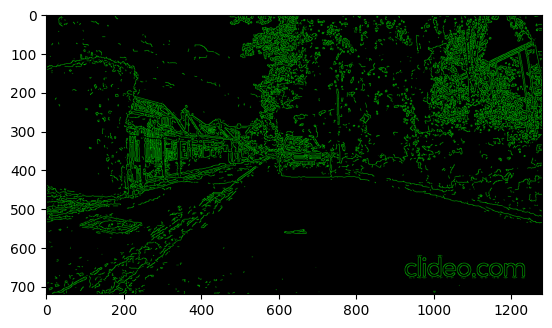

In [119]:
frame = get_frame(frames[4])
canny=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
canny=cv2.GaussianBlur(canny,(5,5),0)
canny=cv2.Canny(canny,235,250, apertureSize=5)

# canny.shape

# overlay = np.zeros(canny.shape + (3,))


In [ ]:
# image_edges = cv2.Canny(frame,10,200)

import time
canny=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# canny=cv2.GaussianBlur(canny,(3,3),0)

canny=cv2.Canny(canny,0,1000, apertureSize=5)
plt.imshow(canny)
    # time.sleep(0.2)
    # plt.imshow(gray, cmap='gray')

In [ ]:

img = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
# plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')

plt.subplot(2,2,3),plt.imshow(sobel_8u,cmap = 'gray')

plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])




# plt.imshow(img)

In [ ]:
sobel = cv2.Sobel(frame, cv2.CV_64F, 1, 0)
abs_sobel = np.absolute(sobel)
scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
plt.imshow(sobel)

In [ ]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
plt.imshow(frame)


In [ ]:
mask = cv2.inRange(frame, (40, 0, 0), (70, 255, 255))

plt.imshow(mask)


In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image=frame, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_AA)50